In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [2]:
df = pd.read_csv("dataset.csv")

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.shape

(10000, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df.Exited.value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [9]:
df_majority = df[df['Exited'] ==0]
df_minority = df[df['Exited'] ==1]
from sklearn.utils import resample

df_majority_downsampled = resample(df_majority, n_samples= len(df_minority), replace=False)
df = pd.concat([df_minority, df_majority_downsampled])

In [10]:
df = df.sample(frac = 1).reset_index(drop = True)

In [11]:
df.Exited.value_counts()

Exited
1    2037
0    2037
Name: count, dtype: int64

In [12]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,8734,15714241,Haddon,749,Spain,Male,42,9,222267.63,1,0,0,101108.85,1
1,9671,15651336,Chidiebere,756,France,Female,32,4,0.00,2,1,0,147040.25,0
2,3318,15575119,Hughes,779,France,Male,71,3,0.00,2,1,1,146895.36,1
3,6777,15800583,Chukwuemeka,621,Spain,Female,43,8,0.00,1,0,0,102806.60,0
4,4516,15761654,Boni,726,Spain,Male,30,8,134152.29,1,1,1,147822.44,0


In [13]:
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis =1)

In [14]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,749,Spain,Male,42,9,222267.63,1,0,0,101108.85,1
1,756,France,Female,32,4,0.00,2,1,0,147040.25,0
2,779,France,Male,71,3,0.00,2,1,1,146895.36,1
3,621,Spain,Female,43,8,0.00,1,0,0,102806.60,0
4,726,Spain,Male,30,8,134152.29,1,1,1,147822.44,0


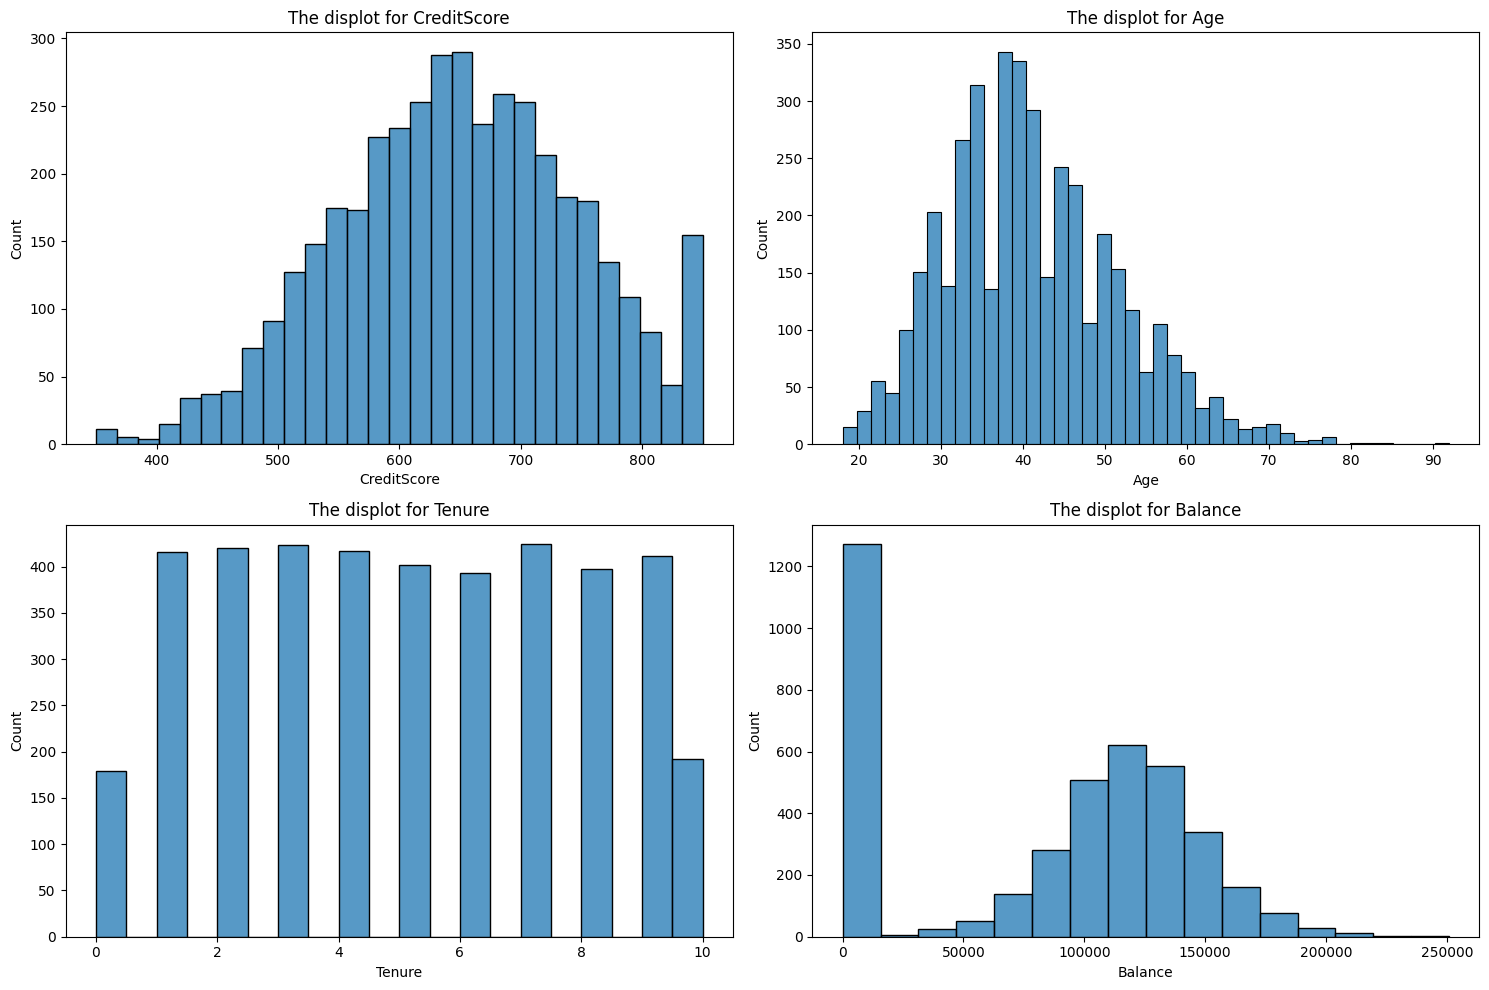

In [15]:
plt.figure(figsize=(15,10))
for i, column in enumerate(['CreditScore', 'Age', 'Tenure', 'Balance']):
    plt.subplot(2, 2, i+1)
    sns.histplot(df[column])
    plt.title(f"The displot for {column}")

plt.tight_layout()


In [16]:
df.Exited.value_counts()

Exited
1    2037
0    2037
Name: count, dtype: int64

In [17]:
df.Geography.value_counts()

Geography
France     1888
Germany    1271
Spain       915
Name: count, dtype: int64

In [18]:
df.Gender.value_counts()

Gender
Male      2053
Female    2021
Name: count, dtype: int64

In [19]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,749,Spain,Male,42,9,222267.63,1,0,0,101108.85,1
1,756,France,Female,32,4,0.00,2,1,0,147040.25,0
2,779,France,Male,71,3,0.00,2,1,1,146895.36,1
3,621,Spain,Female,43,8,0.00,1,0,0,102806.60,0
4,726,Spain,Male,30,8,134152.29,1,1,1,147822.44,0


In [20]:
df.sample()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
2098,644,Germany,Male,34,9,112746.54,2,0,0,141230.07,0


In [21]:
X = df.iloc[:, :-1]
Y = df.iloc[:, -1]

In [22]:
num_features = X.select_dtypes(exclude='object').columns
num_features

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary'],
      dtype='object')

In [23]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,749,Spain,Male,42,9,222267.63,1,0,0,101108.85,1
1,756,France,Female,32,4,0.00,2,1,0,147040.25,0
2,779,France,Male,71,3,0.00,2,1,1,146895.36,1
3,621,Spain,Female,43,8,0.00,1,0,0,102806.60,0
4,726,Spain,Male,30,8,134152.29,1,1,1,147822.44,0


In [24]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
transformer = ColumnTransformer([
    ('trf1' , OneHotEncoder(drop='first'), ['Geography', 'Gender']),
    ('trf2', StandardScaler(), num_features)

], remainder= 'passthrough')

In [25]:
X = transformer.fit_transform(X)

In [26]:
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,10
0,0.0,1.0,1.0,1.011613,0.079104,1.387358,2.297121,-0.753793,-1.559545,-0.927052,0.010669
1,0.0,0.0,0.0,1.082467,-0.871259,-0.341958,-1.356878,0.734072,0.641212,-0.927052,0.811173
2,0.0,0.0,1.0,1.315271,2.835155,-0.687821,-1.356878,0.734072,0.641212,1.078688,0.808647
3,0.0,1.0,0.0,-0.283996,0.174140,1.041495,-1.356878,-0.753793,-1.559545,-0.927052,0.040258
4,0.0,1.0,1.0,0.778808,-1.061331,1.041495,0.848537,-0.753793,0.641212,1.078688,0.824805
...,...,...,...,...,...,...,...,...,...,...,...
4069,0.0,1.0,1.0,1.861856,-0.871259,0.349768,-1.356878,-0.753793,0.641212,1.078688,-0.979004
4070,0.0,0.0,1.0,0.050028,-0.871259,1.387358,0.639808,-0.753793,0.641212,-0.927052,1.561080
4071,1.0,0.0,0.0,-1.012776,0.174140,-0.687821,0.862237,-0.753793,0.641212,-0.927052,-1.645142
4072,1.0,0.0,0.0,0.566247,1.219538,-0.687821,0.712696,2.221938,0.641212,-0.927052,-0.078133


In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3)

In [28]:
X_train.shape

(2851, 11)

In [29]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping, TensorBoard
from keras.optimizers import Adam
import datetime

In [30]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape = (11,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

c:\Users\adpub\anaconda3\envs\my_ml_env\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [31]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,881 (11.25 KB)

 Trainable params: 2,881 (11.25 KB)

 Non-trainable params: 0 (0.00 B)

In [32]:
model.compile(loss= 'binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [33]:
callbacks = EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001, 
    patience=2,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=True,
    start_from_epoch=0,
)

In [34]:
history = model.fit(X_train, Y_train, validation_split=0.2, epochs=50, callbacks= callbacks)

Epoch 1/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5989 - loss: 0.6580 - val_accuracy: 0.7128 - val_loss: 0.5723
Epoch 2/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7295 - loss: 0.5553 - val_accuracy: 0.7426 - val_loss: 0.5291
Epoch 3/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7301 - loss: 0.5258 - val_accuracy: 0.7513 - val_loss: 0.5017
Epoch 4/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7481 - loss: 0.5079 - val_accuracy: 0.7601 - val_loss: 0.4888
Epoch 5/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7398 - loss: 0.5162 - val_accuracy: 0.7601 - val_loss: 0.4711
Epoch 6/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7588 - loss: 0.4915 - val_accuracy: 0.7671 - val_loss: 0.4624
Epoch 7/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7542 - loss: 0.4930 - val_accuracy: 0.7793 - val_loss: 0.4581
Epoch 8/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7767 - loss: 0.4676 - val_accuracy: 0.7723 - val_loss:

In [35]:
y_prob = model.predict(X_test)

39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [36]:
y_pred = np.where(y_prob > 0.5, 1, 0)

In [37]:
from sklearn.metrics import accuracy_score
print(accuracy_score(Y_test, y_pred))

0.7784137367130008


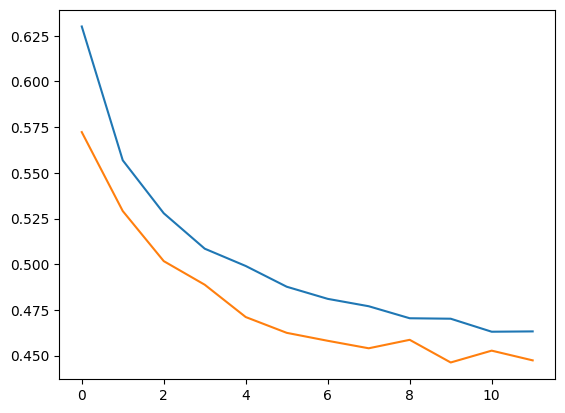

In [38]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

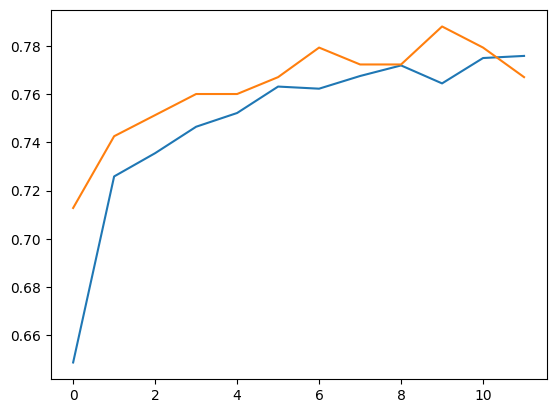

In [39]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [40]:
with open('transformer.pkl', 'wb') as file:
    pickle.dump(transformer, file)

In [41]:
model.save('model.h5')

In [42]:
import keras_tuner as kt

In [43]:
X_train.shape

(2851, 11)

In [ ]:
def build_model(hp):
    model = Sequential()
    for i in range(hp.Int('num_layer', min_value=1, max_value=5, step=1)):
        if i == 0:
            model.add(Dense(
                hp.Int('units' + str(i), min_value=8, max_value=256, step=8),
                activation=hp.Choice('activation' + str(i), values=['relu', 'tanh']),
                input_shape=(11,)
            ))
            model.add(Dropout(hp.Choice('dropout' +str(i), values = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])))
            
        else:
            model.add(Dense(
                hp.Int('units' + str(i), min_value=8, max_value=256, step=8),
                activation=hp.Choice('activation' + str(i), values=[ 'relu', 'tanh'])
            ))
            model.add(Dropout(hp.Choice('dropout' +str(i), values = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])))

    model.add(Dense(1, activation='sigmoid'))

    model.compile(
        optimizer=hp.Choice('optimizer', values=['rmsprop', 'adam', 'sgd', 'nadam', 'adadelta']),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

    return model


In [111]:
tuner = kt.RandomSearch(build_model, objective='val_accuracy', max_trials=5)

c:\Users\adpub\anaconda3\envs\my_ml_env\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [112]:
tuner.search(X_train, Y_train, epochs = 10, validation_split = 0.2)

Trial 5 Complete [00h 00m 04s]
val_accuracy: 0.7040280103683472

Best val_accuracy So Far: 0.7723292708396912
Total elapsed time: 00h 00m 23s


In [104]:
tuner.get_best_hyperparameters()[0].values

{'num_layer': 2,
 'units0': 56,
 'activation0': 'relu',
 'optimizer': 'rmsprop',
 'units1': 16,
 'activation1': 'relu',
 'units2': 112,
 'activation2': 'relu',
 'units3': 80,
 'activation3': 'sigmoid',
 'units4': 56,
 'activation4': 'sigmoid',
 'units5': 64,
 'activation5': 'tanh',
 'units6': 24,
 'activation6': 'relu',
 'units7': 40,
 'activation7': 'tanh',
 'units8': 96,
 'activation8': 'relu',
 'units9': 72,
 'activation9': 'sigmoid'}

In [113]:
model1 = tuner.get_best_models(num_models=1)[0]

c:\Users\adpub\anaconda3\envs\my_ml_env\Lib\site-packages\keras\src\saving\saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 2 variables whereas the saved optimizer has 8 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [114]:
model1.fit(X_train, Y_train, epochs=10, initial_epoch=6, validation_split=0.2)

Epoch 7/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7354 - loss: 0.5481 - val_accuracy: 0.7706 - val_loss: 0.4840
Epoch 8/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7376 - loss: 0.5174 - val_accuracy: 0.7793 - val_loss: 0.4797
Epoch 9/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7365 - loss: 0.5300 - val_accuracy: 0.7723 - val_loss: 0.4754
Epoch 10/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7448 - loss: 0.5182 - val_accuracy: 0.7811 - val_loss: 0.4646


In [115]:
loss, accuracy1 = model1.evaluate(X_test, Y_test)
accuracy1

39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7802 - loss: 0.4690


0.7636958360671997